In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


# import kagglehub

# Download latest version
# path = kagglehub.dataset_download('C:/Users/WoolsteJ/code/causal_modeling/uplift-modeling/data/')

# print("Path to dataset files:", path)

datapath = 'C:/Users/WoolsteJ/code/causal_modeling/uplift-modeling/data/'

The dataset was created by The Criteo AI Lab. The dataset consists of 13M rows, each one representing a user with 12 features, a treatment indicator and 2 binary labels (visits and conversions). Positive labels mean the user visited/converted on the advertiser website during the test period (2 weeks). The global treatment ratio is 84.6%. It is usual that advertisers keep only a small control population as it costs them in potential revenue.

Following is a detailed description of the features:

- f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11: feature values (dense, float)
- treatment: treatment group (1 = treated, 0 = control)
- conversion: whether a conversion occured for this user (binary, label)
- visit: whether a visit occured for this user (binary, label)
- exposure: treatment effect, whether the user has been effectively exposed (binary)

https://www.kaggle.com/datasets/arashnic/uplift-modeling


The process for calculating the X-learner model and subsequent model performance metrics largely follows Mohamed Hmamouch's article on Medium

https://medium.com/@med.hmamouch99/beyond-churn-models-how-causal-inference-and-uplift-modeling-drive-effective-retention-1ddedbac2f12

In [4]:
# Load criteo-uplift data set
df = pd.read_csv(datapath + 'criteo-uplift-v2.1.csv')

In [5]:
df.shape[0]

13979592

In [8]:
df.head(20)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
5,12.616365,10.059654,8.904507,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
6,12.616365,10.059654,8.783340,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
7,12.616365,10.059654,8.964528,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
8,12.616365,10.059654,9.037809,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
9,12.616365,10.059654,9.015128,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


# Naive OLS

In [47]:
# naive estimate of the treatment effect using OLS
# Create a list of features to control for including the treatement variable of interest
features=['treatment']
for i in range(12):
   features.append(f'f{i}')
print(features)

X = df[features]
X = sm.add_constant(X)
# identify the target or outcome to be predicted
y = df['conversion']

# Split the data into training and testing sets, stratify over treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['treatment'], random_state=42)

['treatment', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']


In [48]:
# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Get the summary of the model
summary = model.summary()

In [49]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                 1.452e+05
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:07:00   Log-Likelihood:             2.1871e+07
No. Observations:            13979592   AIC:                        -4.374e+07
Df Residuals:                13979578   BIC:                        -4.374e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2676      0.003    -79.792      0.000      -0.274      -0.261
treatment      0.0009   3.79e-05     24.160      0.000       0.001       0.001
f0         -2.392e-05   3.78e-06     -6.320      0.000   -3.13e-05   -1.65e-05
f1             0.0042      0.000     22.168      0.000       0.004       0.005
f2            -0.0013   6.85e-05    -18.695      0.000      -0.001      -0.001
f3            -0.0008   1.51e-05    -55.257      0.000      -0.001      -0.001
f4             0.0396   8.11e-05    488.368      0.000       0.039       0.040
f5            -0.0022   6.73e-05    -32.030      0.000      -0.002      -0.002
f6            -0.0001   4.42e-06    -29.773      0.000      -0.000      -0.000
f7            -0.0003   1.97e-05    -14.342      0.000      -0.000      -0.000
f8            -0.0077      0.001    -15.315      0.000      -0.009      -0.007
f9             0.0002   3.79e-06     47.659      0.000       0.000       0.000
f10           -0.0351      0.000   -283.101      0.000      -0.035      -0.035
f11           -0.3379      0.001   -354.823      0.000      -0.340      -0.336
==============================================================================
Omnibus:                 27247049.164   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      51285065251.706
Skew:                          15.775   Prob(JB):                         0.00
Kurtosis:                     298.043   Cond. No.                     8.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on this simple OLS model using the full data set, being exposed to the treatment increases expected conversion on average by .0009 units. 

# X - Learner
X - learner is a multi step technique aimed at identifying the conditional average treatement efffect (CATE) or individual treatement effect (ITE) directly.
This is accomplished by splitting the data into two groups and estimating a model for each group with the same set of features.
 1. treated group (We'll call this ML_t)
 2. control group (We'll call this ML_c)
Generate predictions for each group using these models (Pred_t, and Pred_c)


Estimate counterfactual outcomes for each group to understand the effect of treatement for each observations by using the other model to generate predictions
 - For observations who received the treatment, we use the untreated model (ML_c) to predict what their outcome would have been without the treatment (cfact_t)
 - For observations who did not receive the treatement, we use the treated model (ML_t) to predict what their outcome would have been with the treatement (cfact_c)

 We then calcuate the difference (D) between the observed and counterfactual predictions (Pay attendtion to the order of subtraction! The overarching goal is to understand the effect of being treated vs not so we want the treated outcome minus the untreated outcome)
 - For the treated group we subtract the counterfactual from the predicted value (Pred_t - cfact_t) = D_t 
    - (This is because the counterfactual is the untreated outcome)
 - For the control group we subtract the predicted value from the counterfactual (cfact_c - Pred_c) = D_c 
    - This is because the counterfactual for this group is the treated outcome

 Finally, we train 2 new models using these differences as the explanatory variable against the outcome (Y)
 - For the treated group: Yhat_t = f(D_t)
 - For the control group: Yhat_c = f(D_c)

For new customers, we generate predictions using both models and subtract to obtain the predicted individual treatment effect.
- For greater accuracy this difference can be weighted using propensity scores (the probablity of being treated given a customer's characteristics). This accounts for scenarios where there are few treated individuals or few untreated individuals.


In [50]:
# Use the testing data to further split the group into treated and control groups

# Create boolean lists that identify treated and not treated observations
is_treated = np.where(X_test['treatment']==1,True,False)
not_treated = np.where(X_test['treatment']==0,True,False)

# Limit to treated observations
X_treat = X_test[is_treated]
y_treat = y_test[is_treated]

# limit to not treated observations
X_cntrl = X_test[not_treated]
y_cntrl = y_test[not_treated]

# Drop the treatment indicator from the data
X_treat = X_treat.drop(columns = 'treatment')
X_cntrl = X_cntrl.drop(columns = 'treatment')

# Confirm that X_ctrl and y_ctrl should have the same number of records
assert X_cntrl.shape[0]==y_cntrl.shape[0]
assert X_test.shape[0]==y_test.shape[0]

### Fit the models for the treated and untreated groups

In [51]:
# Model Fitting
# Treated group
ML_t = sm.OLS(y_treat, X_treat).fit()
# Control group
ML_c = sm.OLS(y_cntrl, X_cntrl).fit()

### Obtain the predicted and counterfactual values for the treated and untreated groups

In [52]:
# Generate the predicted values

# Treated Group
# Predicted values for the treated group using the treated group model
Pred_t = ML_t.predict(X_treat)
# counterfactual values for the treated group using the control group model
Cfact_t = ML_c.predict(X_treat)

# Control Group
# Predicted values for the control group using the control group model
Pred_c = ML_c.predict(X_cntrl)
# Counterfactual values for the control group using the treated group model
Cfact_c = ML_t.predict(X_cntrl)

### Calculate the differences for the two groups to obtain the individual estimated effect of the treatment

In [53]:
# Treated values minus untreated values
D_t = Pred_t - Cfact_t
D_c = Cfact_c - Pred_c

# Average Treatment effect on the treated
print(f'The average treatment effect on the treated is: {D_t.mean()}')

# Average Treatment effect on the untreated
print(f'The average treatment effect on the untreated is: {D_c.mean()}')


The average treatment effect on the treated is: 0.001087579530838163
The average treatment effect on the untreated is: 0.0009699069492981074


In [54]:
# Fit new models using the differences as the target enabling out of sample predictions
M_Dt = sm.OLS(D_t, X_treat).fit()
M_Dc = sm.OLS(D_c, X_cntrl).fit()

In [57]:
# Generate predictions for the test data but don't include treatment as an explanatory factor

test_pred_t = M_Dt.predict(X_test.drop(columns = 'treatment'))
test_pred_c = M_Dc.predict(X_test.drop(columns = 'treatment'))


In [61]:
# Calculate propensity scores for the test group to compute an estimate of the treatment effect on each person weighted by the probability of being treated
# Fit a model of X_test on treatment and generate predictions to be used as propensity scores
X_test2 = X_test.drop(columns = 'treatment')
y_test2 = X_test['treatment']

# Fit the logistic regression model (the data already has an intercept term so I need to suppress that feature in the sklearn model for Logistic Regression)
model = LogisticRegression(fit_intercept=False)
model.fit(X_test2, y_test2)

# Estimate propensity scores
pscore = model.predict_proba(X_test2)[:, 1]

In [62]:
# Merge our estimates of the propensity score weighted effect of the treatment for each individual onto the test data
X_test['CATE'] = pscore*test_pred_t - (1-pscore)*test_pred_c

# Why do we care about individual treatment effects?
In causal inference, our main goal is to estimate the causal impact of an action. In this case, it’s the effect of a “treatment” — say, offering a discount — on customer behavior. To put it simply, causal impact measures the difference between the behavior of the same customer if they receive the treatment versus if they don’t.


#### Causal Impact

<p align="center"> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*IypGsOeQUTYPx4npnQzwVg.png"/> </p>

- **Yi​(1)**: The outcome for a customer if they receive the treatment.
- **Yi​(0)**: The outcome for the same customer if they don’t receive the treatment.

For every specific customer we try to estimate the conditional average treatment effect (CATE) which gives us the expected impact of a treatment on an _individual_ customer, given _their_ specific characteristics. It’s the difference between the predicted behavior of a customer with the treatment and without it, conditioned on their individual traits

Instead of blasting all customers above a certain churn threshold, we divide them into more specific groups. That way, each group could get a tailored retention strategy. Something like this:

- **Sure Things**: Loyal customers who are almost guaranteed to stay. They don’t need any extra perks or discounts; in fact, targeting them is often a waste of resources.
- **Do Not Disturb**: These are customers who are unlikely to churn — unless they’re reminded. Sounds weird, but think about it: many of us have subscriptions to apps we hardly use but continue to pay for. If one of those apps suddenly sends a push notification, it might remind us that we’re paying for something we barely use, leading us to… unsubscribe! These are the “Do Not Disturb” customers — they’re more likely to stay if left alone.
- **Persuadables**: These are your real targets! Persuadables are customers at risk of churning but who are open to being convinced to stay — if we offer something valuable, like a discount or a personalized benefit.
- **Lost Causes**: Customers who are likely to leave no matter what because they feel disengaged. Here, the goal is to see if you can move some of these customers into the “Persuadable” category by offering targeted incentives.

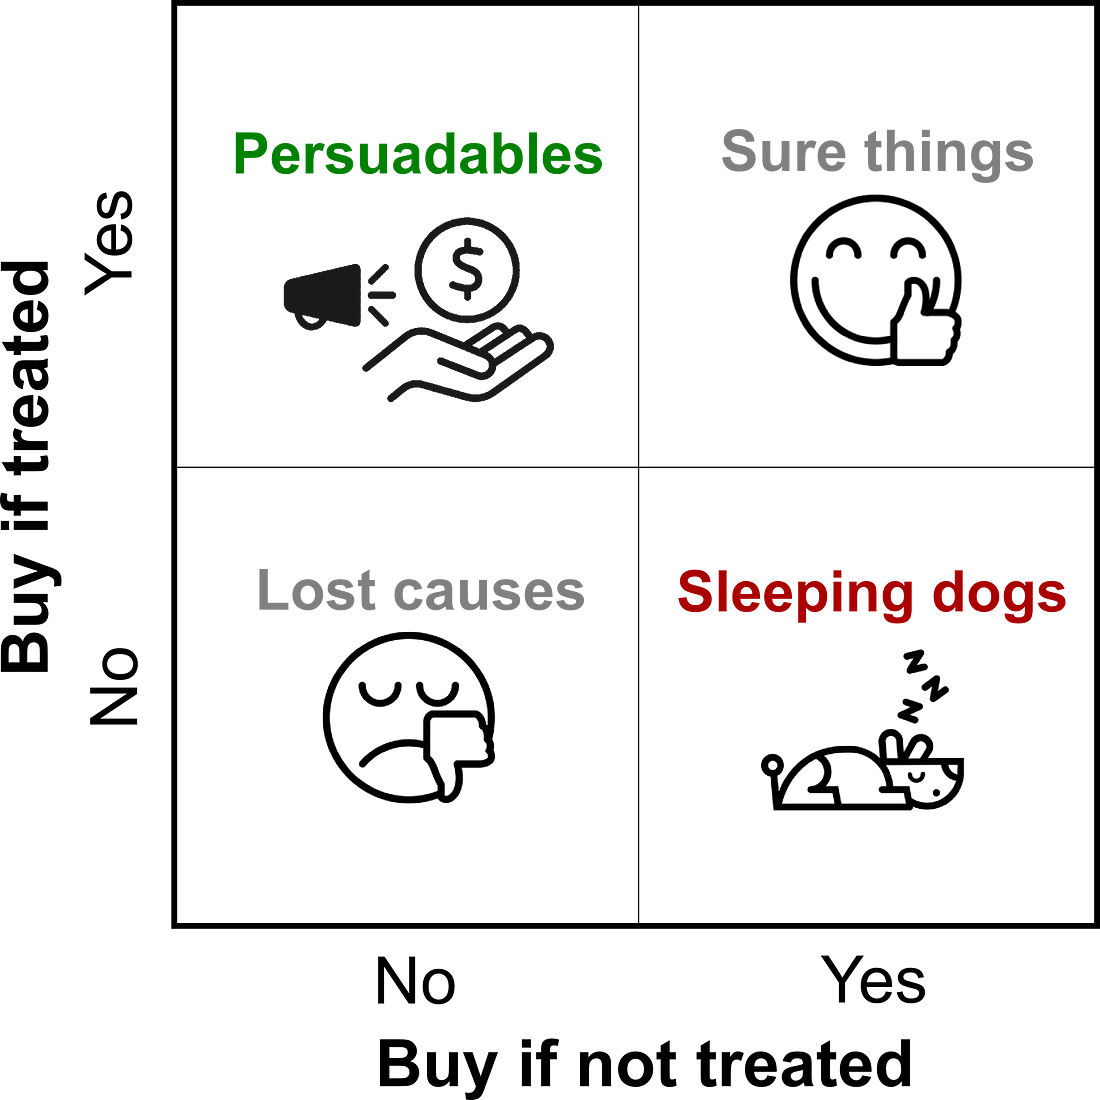

## Model Performance Metrics

In [63]:
# Calculate deciles based on CATE and plot a bargraph 
X_test['CATE_decile'] = pd.qcut(X_test['CATE'], 10, labels=False)

In [72]:
# Calculate the average CATE within each decile
deciles = pd.pivot_table(data = X_test, index = 'CATE_decile', values= 'CATE', aggfunc = 'mean').sort_values(by = 'CATE_decile', ascending=True)

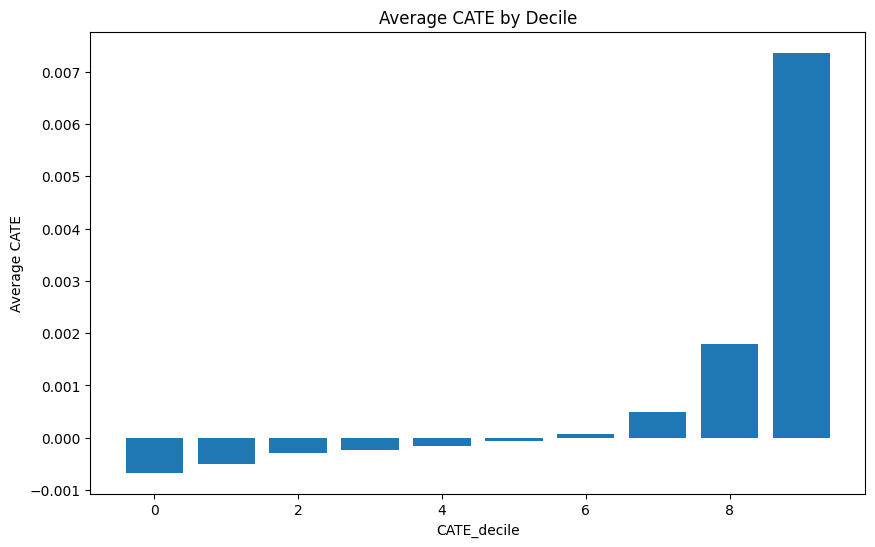

In [73]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(deciles.index, deciles['CATE'])
plt.xlabel('CATE_decile')
plt.ylabel('Average CATE')
plt.title('Average CATE by Decile')
plt.show()